#Кластеризация
Алгоритм кластеризации может запускаться тогда. когда нам не хватает информации, например мы собрали кучу данных, но забыли про графу пол. И сейчас не понимаем, кто мужчины, а кто женщины. В таком случае возможно воспользоваться кластеризацией. Разумеется данные которые мы получим будут округлены и не всегда верны.

In [3]:
#import frameworks
from sklearn.cluster import KMeans
import pandas as pd #https://pandas.pydata.org/
import seaborn as sns

In [9]:
#Загрузка наших данных
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students.csv', delimiter=',')
#Создание укороченной таблицы
df_cut=df[['Weight', 'Growth', 'Sex']]

In [10]:
#удаление записей с нулями
df_cut=df_cut.dropna()

In [13]:
df_cut.head()

,Weight,Growth,Sex,label,Label
0,64.0,170,женский,1,1
1,73.0,191,мужской,0,0
2,60.0,172,мужской,1,1
3,59.0,168,женский,1,1
4,57.0,159,женский,1,1


In [12]:
#Разбивание наших данных на группы
kmeans=KMeans(n_clusters=2, random_state=0) #Создание "ИИ" kmeans, который и будет решать задачу кластеризации
kmeans.fit(df_cut[['Weight', 'Growth']]) #Передача данных и запуск кластеризации
df_cut['Label']=kmeans.labels_ #Запрос выдачи данных

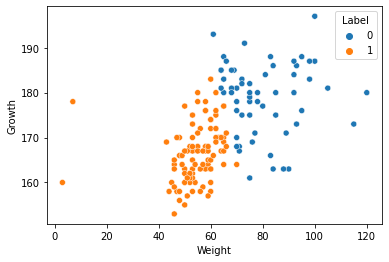

In [14]:
#Визуализация метода работы kmeans
sns.scatterplot(data=df_cut, x='Weight', y='Growth', hue='Label')

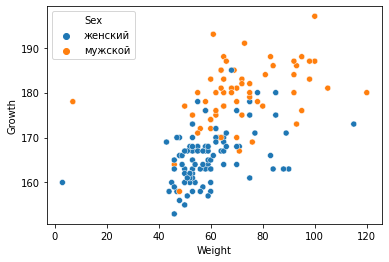

In [16]:
#Визуализация метода работы kmeans с меткой по полу
sns.scatterplot(data=df_cut, x='Weight', y='Growth', hue='Sex')

Быстрый подсчет объектов, удовлетворяющих тому или иному условию.

In [19]:
#Посчет количества объектов, удовлетворяющих условию в скобках
sum((df_cut['Sex']=='мужской') & (df_cut['Weight'] > 100))

2

In [20]:
#Проверяем на скольки мужчинах ошибся кластеризатор
sum((df_cut['Sex']=='мужской') & (df_cut['Label'] == 1))

21

In [25]:
#Проверяем на скольки женщинах ошибся кластеризатор
sum((df_cut['Sex']=='женский') & (df_cut['Label'] == 0))

17

Не смотря на то, что кластер ошибся. Большую часть людей он распределил правильно.

#Решение задачки

Загрузите в таблицу данные о весе и размере обуви студентов. 

Не забудьте удалить пропуски в данных с помощью молитвы-метода dropna()

Запустите алгоритм kmeans с параметрами n_clusters=2, random_state=1 (параметр random_state=1 нужен для того, чтобы у всех обучающихся был одинаковый ответ, без этого параметра ответы у разных людей могут быть разные).

В окошко ответа запишите количество студентов, которым после кластеризации была присвоена метка 0.

In [29]:
#Создание укороченной таблицы для задания
df_ex=df[['Weight', 'Shoe size']]

In [31]:
df_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Weight     157 non-null    float64
 1   Shoe size  186 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 3.0 KB


In [32]:
#Удаляем лишних студентов, не указавших свой вес
df_ex=df_ex.dropna()

In [33]:
#запускаем kmeans
kmeans=KMeans(n_clusters=2, random_state=1) #Создание "ИИ" kmeans, который и будет решать задачу кластеризации
kmeans.fit(df_ex[['Weight', 'Shoe size']]) #Передача данных и запуск кластеризации
df_ex['Label']=kmeans.labels_ #Запрос выдачи данных

<ipython-input-33-d7489e32b7f4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ex['Label']=kmeans.labels_ #Запрос выдачи данных


In [34]:
#Считаем студентов, которым была присвоема метка 0
sum(df_ex['Label'] == 0)

118